In [1]:
import pandas as pd
import numpy as np

In [28]:
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [2]:
data = pd.read_csv('data/train-ml_v3.csv')

In [3]:
sorted([col for col in data.columns])

['airconditioningtypeid_13.0',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid_10.0',
 'buildingqualitytypeid_11.0',
 'buildingqualitytypeid_12.0',
 'buildingqualitytypeid_3.0',
 'buildingqualitytypeid_5.0',
 'buildingqualitytypeid_7.0',
 'buildingqualitytypeid_8.0',
 'calculatedfinishedsquarefeet',
 'fips_6059.0',
 'fullbathcnt',
 'hashottuborspa_1',
 'heatingorsystemtypeid_13.0',
 'heatingorsystemtypeid_20.0',
 'heatingorsystemtypeid_7.0',
 'landtaxvaluedollarcnt',
 'latitude',
 'logerror',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode_0100',
 'propertycountylandusecode_0101',
 'propertycountylandusecode_0108',
 'propertycountylandusecode_010C',
 'propertycountylandusecode_010D',
 'propertycountylandusecode_010E',
 'propertycountylandusecode_010M',
 'propertycountylandusecode_010V',
 'propertycountylandusecode_012C',
 'propertycountylandusecode_1111',
 'propertycountylandusecode_1128',
 'propertycountylandusecode_1129',
 'propertycountylandusecode_122',
 'pro

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['logerror'], axis=1).values,
                                                    data['logerror'].values,
                                                    test_size=0.2, random_state=4)

In [6]:
len(X_train),len(X_test)

(134305, 33577)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial = PolynomialFeatures(degree=2, include_bias=False)

In [11]:
X_polynomial_features = polynomial.fit_transform(X_train)

In [12]:
X_train.shape, X_polynomial_features.shape

((134305, 46), (134305, 1127))

In [13]:
X_polynomial_features[0]

array([ -1.18561392e+08,   3.41681920e+07,   4.68247000e+05, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [14]:
from sklearn.linear_model import LinearRegression

In [19]:
lin_reg = LinearRegression(n_jobs=-1)

In [20]:
%time lin_reg.fit(X_polynomial_features, y_train)

CPU times: user 44.8 s, sys: 2.32 s, total: 47.1 s
Wall time: 27 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
y_train_preds = lin_reg.predict(X_polynomial_features)

## Training Accuracy

In [25]:
mean_absolute_error(y_train, y_train_preds)

0.069985629160441945

In [26]:
%time y_test_preds = lin_reg.predict(polynomial.transform(X_test))

CPU times: user 1.58 s, sys: 311 ms, total: 1.89 s
Wall time: 1.87 s


## Test Accuracy

Model is overfitting

In [27]:
mean_absolute_error(y_test, y_test_preds)

0.070796295093736195

In [31]:
# From Hands On Machine Learning p. 124,125
from sklearn.pipeline import Pipeline

In [43]:
polynomial_regression = Pipeline((
("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
("linear_regression", LinearRegression(n_jobs=-1)),
))

In [55]:
from tqdm import tqdm_notebook as tqdm

In [68]:
def learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state=4)
    
    train_errors, val_errors = [], []
    
    for m in tqdm(range(10000, len(X_train),10000)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_absolute_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_absolute_error(y_val_predict, y_val))
        
    return train_errors,val_errors

In [73]:
%time train_err,val_err = learning_curves(polynomial_regression,X=data.drop(['logerror'], axis=1).values, y=data['logerror'].values)


CPU times: user 5min, sys: 20.8 s, total: 5min 21s
Wall time: 3min 43s


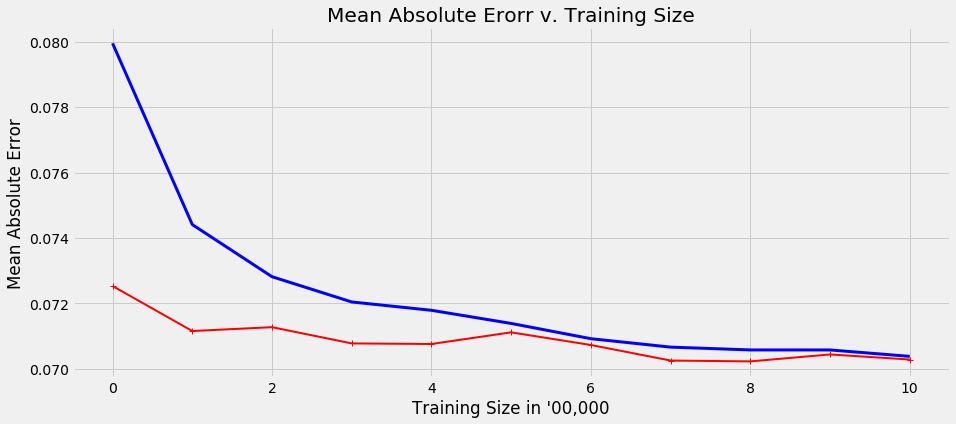

In [93]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(train_err,"r-+",linewidth=2,label="train")
ax.plot(val_err, "b-",linewidth=3, label="validation")

ax.set_xlabel("Training Size in '00,000")
ax.set_ylabel('Mean Absolute Error')

ax.set_title('Mean Absolute Erorr v. Training Size')
plt.show()